## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import re

## Data Wrangling

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/hotels.csv')

In [4]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [7]:
df.duplicated().sum()

31994

In [8]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [9]:
df.drop(columns=['company', 'meal'], inplace=True)

In [10]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## Analyze Data

Before we get into the main topic, let's see the correlation between each variable using heatmap

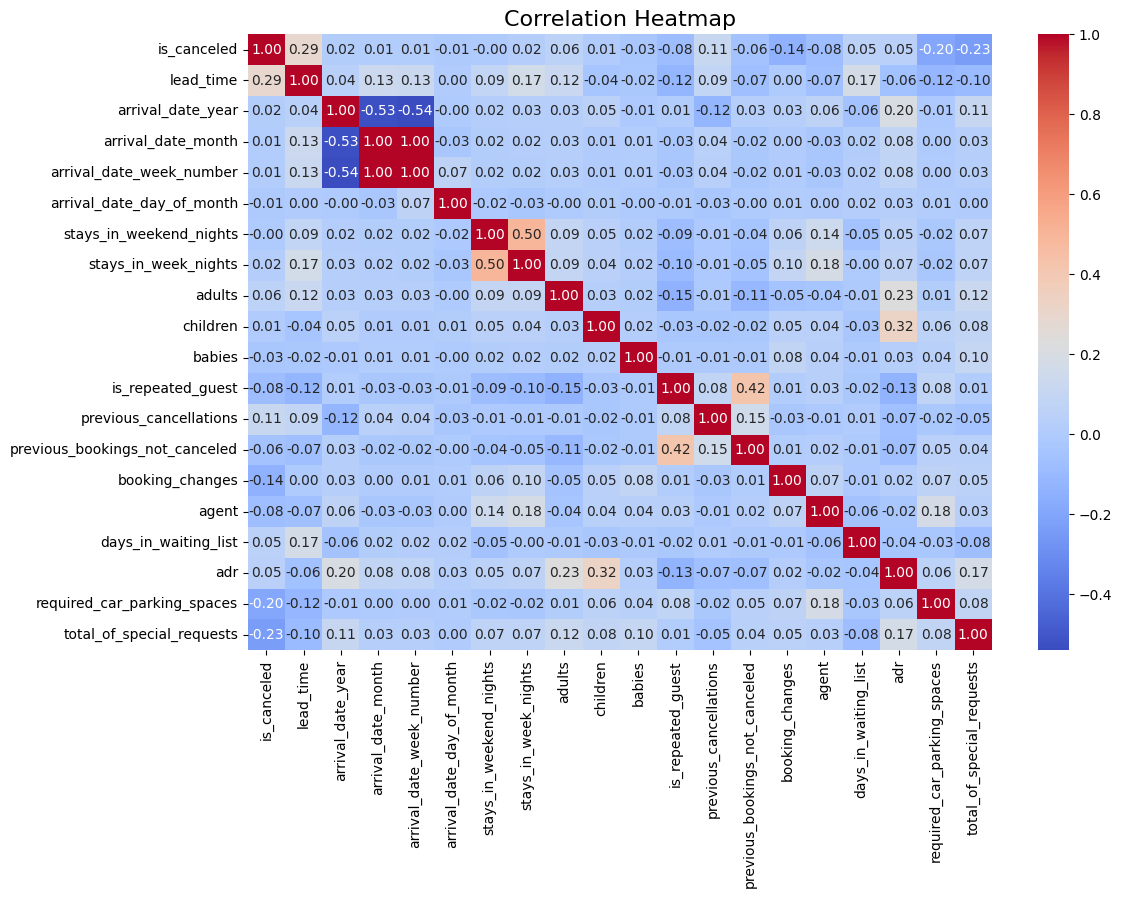

In [25]:
df_corr = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 10})
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### What is the percentage of canceled bookings in each year?

In [11]:
cancellation_by_year = df.groupby('arrival_date_year')['is_canceled'].agg(['sum', 'count'])
cancellation_by_year['cancellation_percentage'] = (cancellation_by_year['sum'] / cancellation_by_year['count']) * 100
cancellation_by_year.columns = ['canceled_bookings', 'total_bookings', 'cancellation_percentage']
print(cancellation_by_year)

                   canceled_bookings  total_bookings  cancellation_percentage
arrival_date_year                                                            
2015                            8142           21996                37.015821
2016                           20337           56707                35.863297
2017                           15745           40687                38.697864


In [12]:
fig = px.line(cancellation_by_year.reset_index(),
              x='arrival_date_year',
              y='cancellation_percentage',
              title='Cancellation Percentage by Year',
              markers=True)
fig.update_xaxes(type='category')
fig.show()

### Is there a pattern of cancelations based on month of arrival?

In [13]:
df['arrival_date_month'] = pd.to_datetime(df['arrival_date_month'], format='%B', errors='coerce').dt.month
cancellation_by_month = df.groupby('arrival_date_month')['is_canceled'].agg(['sum', 'count'])
cancellation_by_month['cancellation_percentage'] = (cancellation_by_month['sum'] / cancellation_by_month['count']) * 100
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
cancellation_by_month.index = cancellation_by_month.index.map(month_names)

fig = px.bar(cancellation_by_month.reset_index(),  # Reset index for plotting
             x='arrival_date_month',
             y='cancellation_percentage',
             title='Cancellation Rate by Month',
             labels={'x': 'Arrival Month', 'y': 'Cancellation Percentage'},
             color='cancellation_percentage')

fig.show()

###  Are repeat guests less likely to cancel?

In [14]:
repeated_guest_cancellation = df.groupby('is_repeated_guest')['is_canceled'].mean()

fig = px.pie(
    names=repeated_guest_cancellation.index.map({0: 'Non-Repeated Guest', 1: 'Repeated Guest'}),
    values=repeated_guest_cancellation.values * 100,
    title='Cancellation Rate by Guest Type',
    color_discrete_sequence=px.colors.sequential.RdBu
)
fig.update_traces(textinfo='percent+label')
fig.show()

### Is there a relationship between days in waiting list and likelihood of cancellation?


In [15]:
df['is_canceled_label'] = df['is_canceled'].replace({0: 'Not Cancelled', 1: 'Cancelled'})

fig = px.violin(df, x='is_canceled_label', y='days_in_waiting_list', box=True, points='all', color='is_canceled_label')
fig.update_layout(
    xaxis_title='Cancellation Status',
    yaxis_title='Days in Waiting List',
)
fig.show()

### How is the distribution of customer type against order quantity?

In [16]:
customer_type_counts = df['customer_type'].value_counts()

fig = px.pie(
    customer_type_counts,
    values=customer_type_counts.values,
    names=customer_type_counts.index,
    title='Distribution of Customer Types',
    color=customer_type_counts.index,  # Set color based on customer type
    color_discrete_map={
        'Transient': 'skyblue',
        'Contract': 'lightcoral',
        'Transient-Party': 'lightgreen',
        'Group': 'gold'
    }
)

fig.show()

### What is the average revenue per day for each hotel?

In [32]:
#Bagaimana rata2 pendapatan perhari untuk masing-masing hotel?
#disini kita akan membagi menjadi subplot untuk masing-masing hotel
#selain itu juga diberikan opsi untuk pilihan weekend atau weekdays

avg_revenue_weekend = df.groupby(['hotel', 'stays_in_weekend_nights'])['adr'].mean().reset_index()
avg_revenue_weekday = df.groupby(['hotel', 'stays_in_week_nights'])['adr'].mean().reset_index()

fig = go.Figure()
for hotel in avg_revenue_weekend['hotel'].unique():
  fig.add_trace(go.Bar(
      x=[hotel],
      y=avg_revenue_weekend[avg_revenue_weekend['hotel']==hotel]['adr'],
      name='Weekend Average Income',
      visible=True,
      ))

for hotel in avg_revenue_weekday['hotel'].unique():
  fig.add_trace(go.Bar(
      x=[hotel],
      y=avg_revenue_weekday[avg_revenue_weekday['hotel']==hotel]['adr'],
      name='Weekday Average Income',
      visible=True
      ))

In [34]:
fig.update_layout(
    updatemenus=[
       dict(
            buttons=list([
                dict(label="Weekend",
                     method="update",
                     args=[{"visible": [True, True, False, False]},
                           {"title": "Average Revenue per Day - Weekend"}]),
                dict(label="Weekday",
                     method="update",
                     args=[{"visible": [False, False, True, True]},
                           {"title": "Average Revenue per Day - Weekday"}]),
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True, True, True]},
                           {"title": "Average Revenue per Day - Both"}])
            ]),
            direction="down",
            showactive=True,
        )
    ], title='Avg Revenue per Day for Each Hotel',
    xaxis_title = 'Hotel',
    yaxis_title = 'Average Revenue',
    barmode='group',
    template='ggplot2'
)

fig.show()

In [55]:
Q1 = df['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR


grouped_data = df[df['adr'] <= upper_bound].groupby(['children', 'hotel'])['adr'].mean().reset_index()


fig_adr_children = px.bar(
    grouped_data,
    x='children',
    y='adr',
    color='hotel',
    barmode='group',
    title='ADR Distribution by Number of Children',
    labels={'children': 'Children',
            'adr': 'Average Daily Rate (ADR)',
            'hotel': 'Hotel Type'}
)

fig_adr_children.update_layout(
    height=700,
    width=1000,
    title_x=0.5,
    showlegend=True,
    legend_title="Hotel Type",
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99
    ),
    yaxis=dict(
        title=dict(
            text='Average Daily Rate (ADR)',
            font=dict(size=14)
        )
    ),
    xaxis=dict(
        title=dict(
            text='Jumlah Anak',
            font=dict(size=14)
        ),
        tickmode='linear',
        dtick=1
    ),
    plot_bgcolor='white',
    xaxis_gridcolor='lightgrey',
    yaxis_gridcolor='lightgrey'
)


fig_adr_children.show()